# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 10/27/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 10/27/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,1038,38928341,2.7
Albania,3774,2877800,131.1
Algeria,3122,43851043,7.1
Andorra,1220,77265,1579.0
Angola,3025,32866268,9.2
Antigua and Barbuda,12,97928,12.3
Argentina,184642,45195777,408.5
Armenia,21786,2963234,735.2
Australia,196,25459700,0.8


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Andorra,1220,77265,1579.0
Czechia,144743,10708982,1351.6
Belgium,152207,11589616,1313.3
Holy See,8,809,988.9
Luxembourg,4854,625976,775.4
Slovenia,15665,2078932,753.5
Armenia,21786,2963234,735.2
Netherlands,116210,17134873,678.2
Switzerland,58338,8654618,674.1


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

10/23/20    426110.0
10/24/20    434798.0
10/25/20    437698.0
10/26/20    450258.0
10/27/20    463419.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

10/14/20        NaN
10/15/20     7620.0
10/16/20     7695.0
10/17/20     4862.0
10/18/20     4007.0
10/19/20     8397.0
10/20/20     8523.0
10/21/20    12331.0
10/22/20     5952.0
10/23/20    22236.0
10/24/20     8688.0
10/25/20     2900.0
10/26/20    12560.0
10/27/20    13161.0
Name: Germany, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


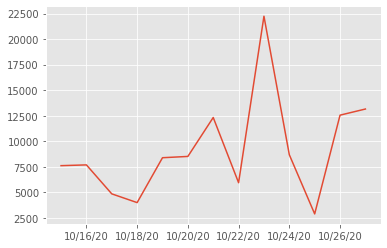

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

141.95082363333452